In [3]:
import numpy as np
# 导入相关函数和类
from dataset import load_CIFAR10

# 设置随机种子
np.random.seed(0)

# 加载 CIFAR-10 数据
data_dir = './cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(data_dir)

# 数据归一化
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 划分验证集：取前 5000 个样本作为验证集，其余作为训练集
num_val = 5000
X_val = X_train[:num_val]
y_val = y_train[:num_val]
X_train_new = X_train[num_val:]
y_train_new = y_train[num_val:]

# 定义输入和输出的维度
input_size = 32 * 32 * 3  # 3072
output_size = 10         # CIFAR-10 共10类

print("训练集样本数：", X_train_new.shape[0])
print("验证集样本数：", X_val.shape[0])
print("测试集样本数：", X_test.shape[0])


训练集样本数： 45000
验证集样本数： 5000
测试集样本数： 10000


Training with learning rate: 0.001
Training with learning rate: 0.005
Training with learning rate: 0.01
Training with learning rate: 0.05
Training with learning rate: 0.1


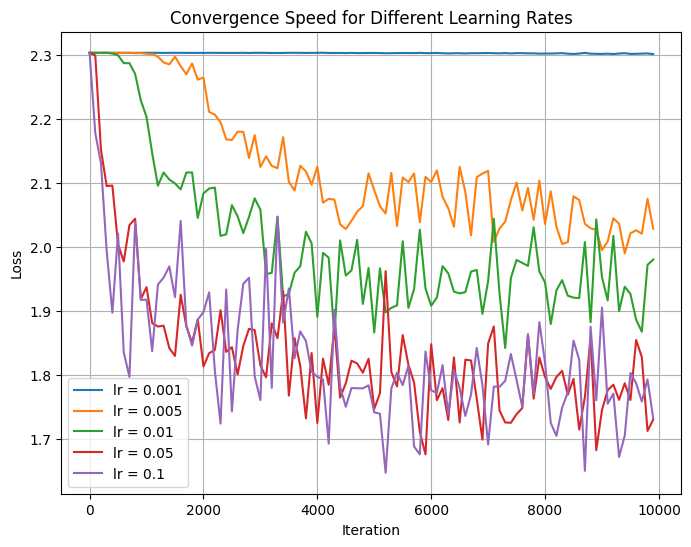

In [4]:
from matplotlib import pyplot as plt

# 从之前的模块导入 train 函数和模型类
from train import train
from model import ThreeLayerNet

# 定义不同学习率用于实验
learning_rates = [1e-3, 5e-3, 1e-2, 5e-2, 1e-1]

# 固定其他超参数
hidden_size = 384       # 隐藏层大小
num_iters = 10000       # 迭代次数
batch_size = 200        # 批量大小
reg = 1e-2              # L2 正则化强度
learning_rate_decay = 0.95

# 保存各个学习率下的 loss 历史
loss_histories = {}

for lr in learning_rates:
    print("Training with learning rate:", lr)
    # 每次都重新构造模型以确保初始参数一致
    net = ThreeLayerNet(input_size, hidden_size, output_size, activation='relu')
    stats = train(net, X_train_new, y_train_new, X_val, y_val,
                  learning_rate=lr,
                  learning_rate_decay=learning_rate_decay,
                  reg=reg,
                  num_iters=num_iters,
                  batch_size=batch_size,
                  verbose=False)
    loss_histories[lr] = stats['loss_history']

# 绘制各个学习率下的 loss 收敛曲线，每隔100个点记录一个数据
plt.figure(figsize=(8, 6))
for lr in learning_rates:
    iterations = range(0, len(loss_histories[lr]), 100)
    loss_sample = loss_histories[lr][::100]
    plt.plot(iterations, loss_sample, label=f"lr = {lr}")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Convergence Speed for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

